### Adjusting Notch Filter

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastparquet, pyarrow
import mne
from mne.decoding import Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
from utils import *

In [2]:
mne.set_log_level('WARNING')

In [73]:
df = pd.read_csv('by_patient.csv')

In [74]:
other_df = activity_df(df, 'Other', 'expert_consensus')
seizure_df = activity_df(df, 'Seizure', 'expert_consensus')
gpd_df = activity_df(df, 'GPD', 'expert_consensus')
lpd_df = activity_df(df, 'LPD', 'expert_consensus')
grda_df = activity_df(df, 'GRDA', 'expert_consensus')
lrda_df = activity_df(df, 'LRDA', 'expert_consensus')
activity_df_list = [other_df, seizure_df, gpd_df, lpd_df, grda_df, lrda_df]

In [5]:
raw1 = load_preprocess(lpd_df, 25, 0.5, 90, notch = False)
raw2 = load_preprocess(lpd_df, 25, 0.5, 90, notch = False)
raw3 = load_preprocess(lpd_df, 25, 0.5, 90, notch = False)
raw4 = load_preprocess(lpd_df, 25, 0.5, 90, notch = False)
raw5 = load_preprocess(lpd_df, 25, 0.5, 90, notch = False)
raw6 = load_preprocess(lpd_df, 50, 0.5, 90, notch = False)
raw7 = load_preprocess(lpd_df, 50, 0.5, 90, notch = False)
raw8 = load_preprocess(lpd_df, 50, 0.5, 90, notch = False)
raw9 = load_preprocess(lpd_df, 50, 0.5, 90, notch = False)
raw10 = load_preprocess(lpd_df, 50, 0.5, 90, notch = False)
raw11 = load_preprocess(lpd_df, 75, 0.5, 90, notch = False)
raw12 = load_preprocess(lpd_df, 75, 0.5, 90, notch = False)
raw13 = load_preprocess(lpd_df, 75, 0.5, 90, notch = False)
raw14 = load_preprocess(lpd_df, 75, 0.5, 90, notch = False)
raw15 = load_preprocess(lpd_df, 75, 0.5, 90, notch = False)
raw16 = load_preprocess(lpd_df, 100, 0.5, 90, notch = False)
raw17 = load_preprocess(lpd_df, 100, 0.5, 90, notch = False)
raw18 = load_preprocess(lpd_df, 100, 0.5, 90, notch = False)
raw19 = load_preprocess(lpd_df, 100, 0.5, 90, notch = False)
raw20 = load_preprocess(lpd_df, 100, 0.5, 90, notch = False)

In [6]:
titles = ['No Notch', 'Zero Phase', 'Minimum Phase', 'Spectrum Fit (Freqs = 60)',
         'Spectrum Fit (Freqs = None)']

In [7]:
raw2.notch_filter(60, picks = 'eeg')
raw3.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw4.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw5.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

<RawArray | 20 x 10000 (50.0 s), ~1.6 MB, data loaded>

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


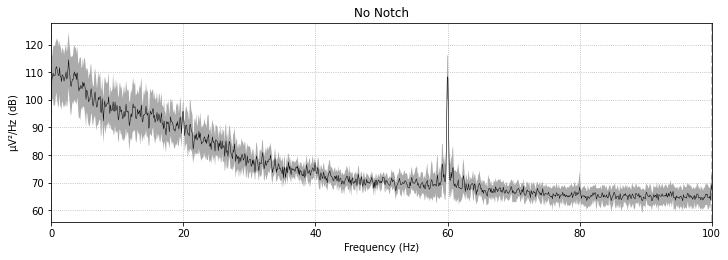

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


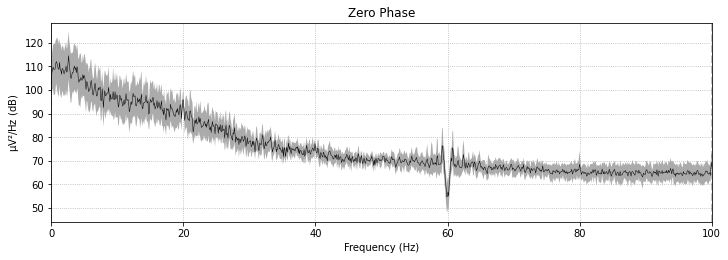

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


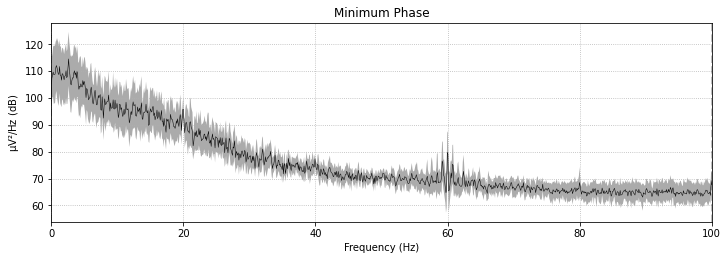

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


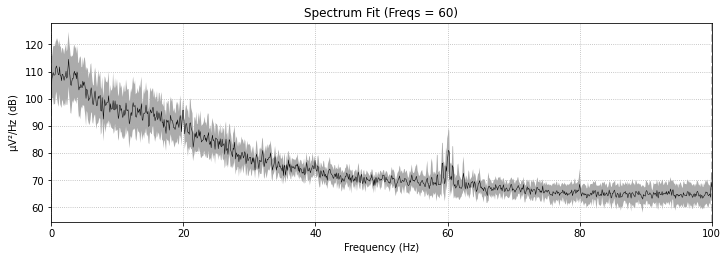

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


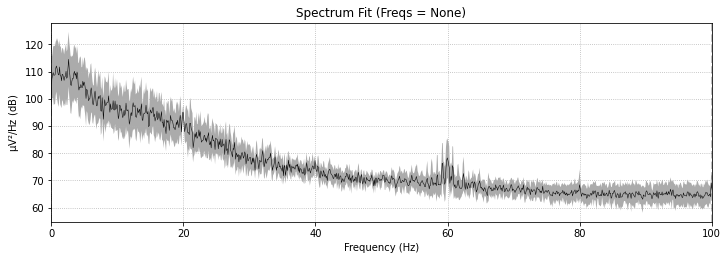

In [8]:
r_lst = [raw1, raw2, raw3, raw4, raw5]
for i in range(len(r_lst)):
    r_lst[i].plot_psd(average = True, picks = 'eeg')
    plt.title(titles[i])
    plt.show()

In [9]:
raw7.notch_filter(60, picks = 'eeg')
raw8.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw9.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw10.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

<RawArray | 20 x 10000 (50.0 s), ~1.6 MB, data loaded>

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


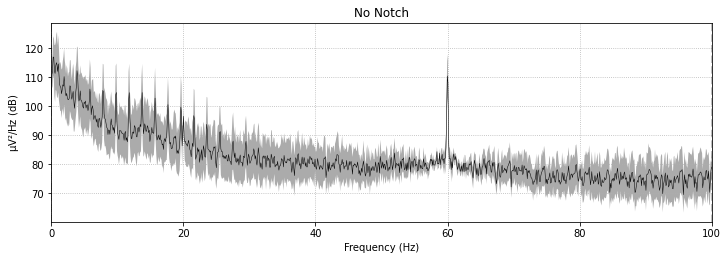

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


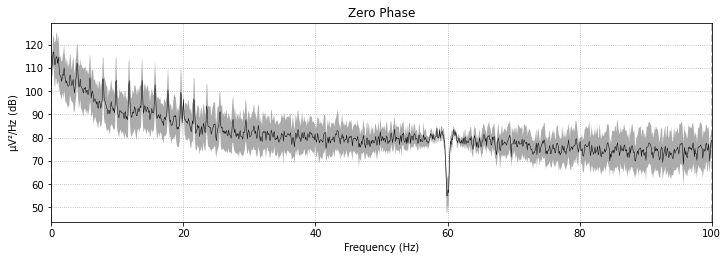

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


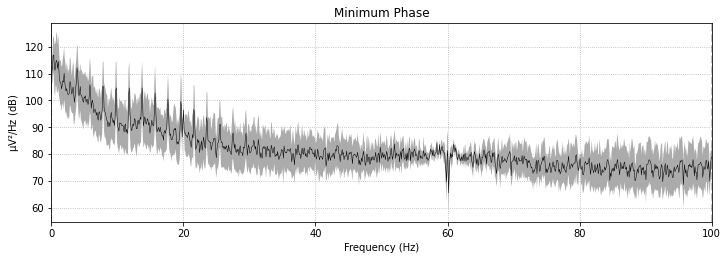

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


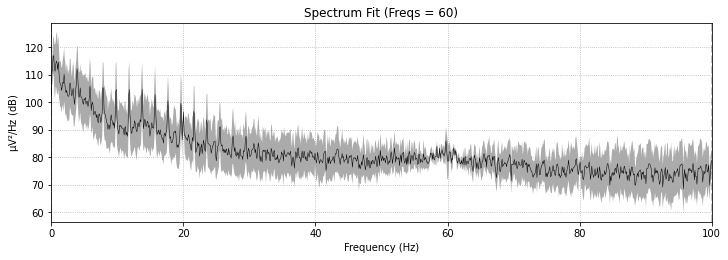

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


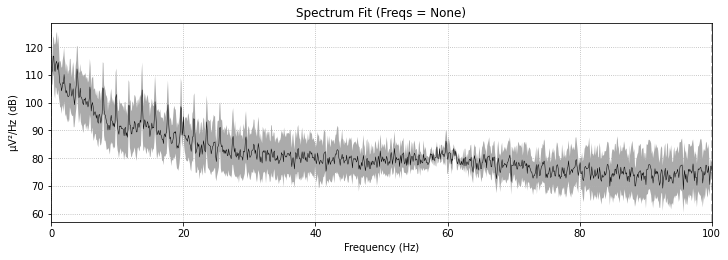

In [10]:
r_lst = [raw6, raw7, raw8, raw9, raw10]
for i in range(len(r_lst)):
    r_lst[i].plot_psd(average = True, picks = 'eeg')
    plt.title(titles[i])
    plt.show()

In [10]:
raw12.notch_filter(60, picks = 'eeg')
raw13.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw14.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw15.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

<RawArray | 20 x 10000 (50.0 s), ~1.6 MB, data loaded>

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


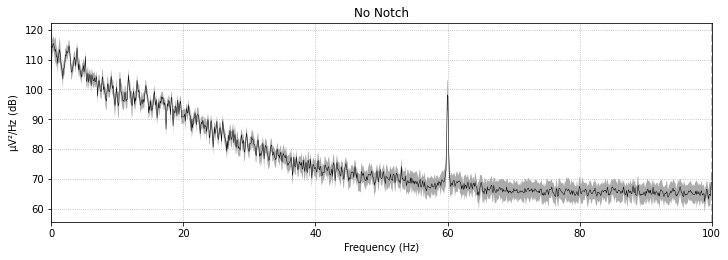

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


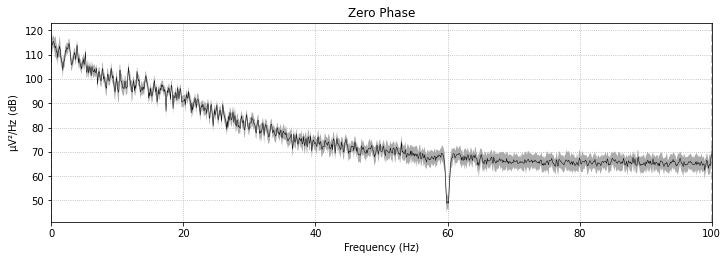

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


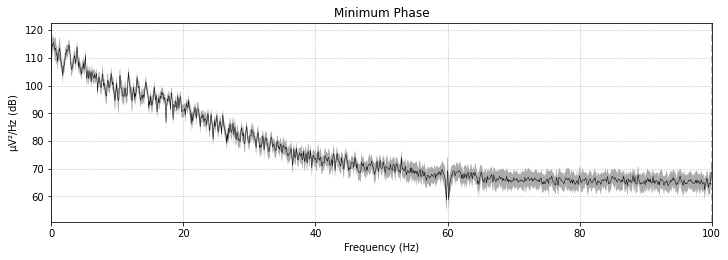

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


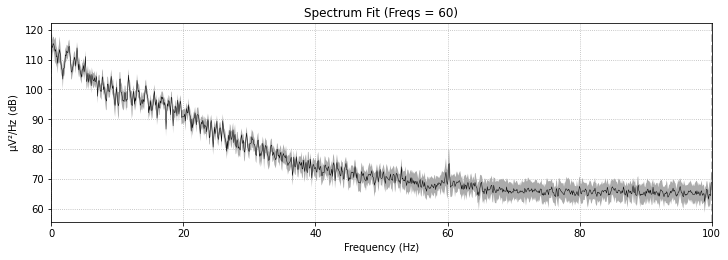

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


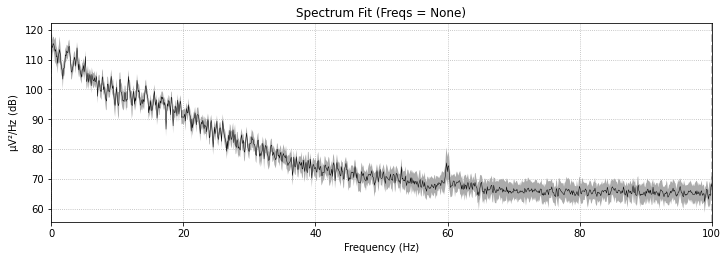

In [11]:
r_lst = [raw11, raw12, raw13, raw14, raw15]
for i in range(len(r_lst)):
    r_lst[i].plot_psd(average = True, picks = 'eeg')
    plt.title(titles[i])
    plt.show()

In [12]:
raw17.notch_filter(60, picks = 'eeg')
raw18.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw19.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw20.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

<RawArray | 20 x 10000 (50.0 s), ~1.6 MB, data loaded>

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


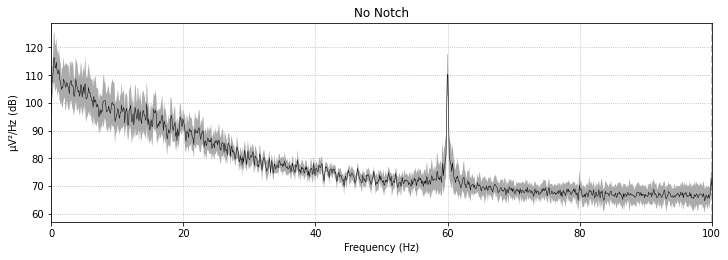

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


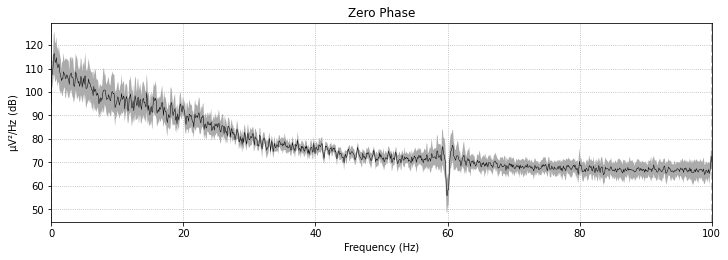

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


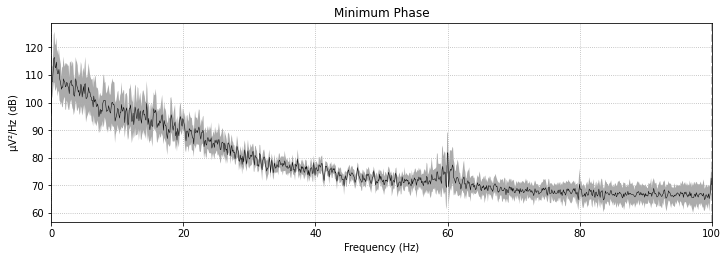

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


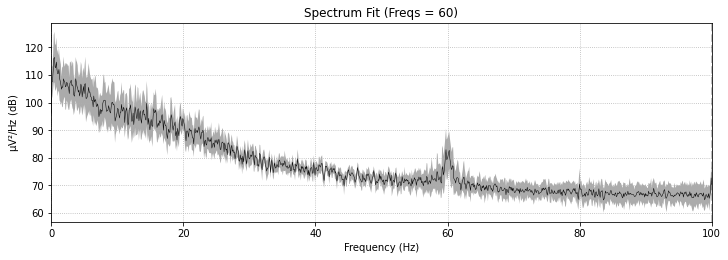

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


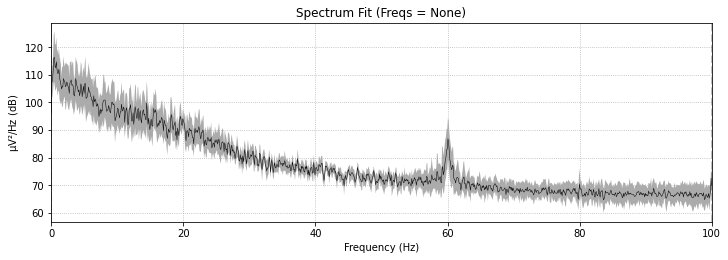

In [14]:
r_lst = [raw16, raw17, raw18, raw19, raw20]
for i in range(len(r_lst)):
    r_lst[i].plot_psd(average = True, picks = 'eeg')
    plt.title(titles[i])
    plt.show()

In [15]:
i_vals = [i for i in range(df.shape[0])]
random_index = np.random.choice(i_vals, size = 1, replace = False)[0]

In [16]:
raw1 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)
raw3 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)
raw4 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)
raw5 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)

In [17]:
raw_list = [raw1, raw2, raw3, raw4, raw5]

raw2.notch_filter(60, picks ='eeg')
raw3.notch_filter(60, phase = 'minimum', picks = 'eeg')
raw4.notch_filter(60, method = 'spectrum_fit', picks = 'eeg')
raw5.notch_filter(freqs = None, method = 'spectrum_fit', picks = 'eeg')

<RawArray | 20 x 10000 (50.0 s), ~1.6 MB, data loaded>

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


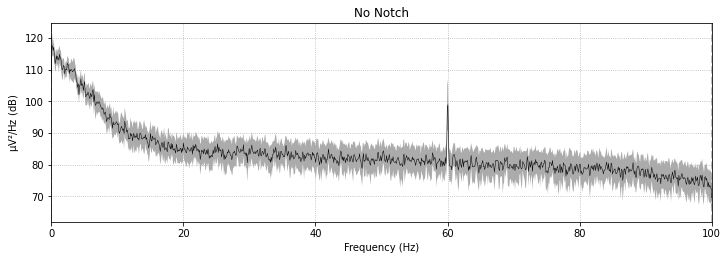

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


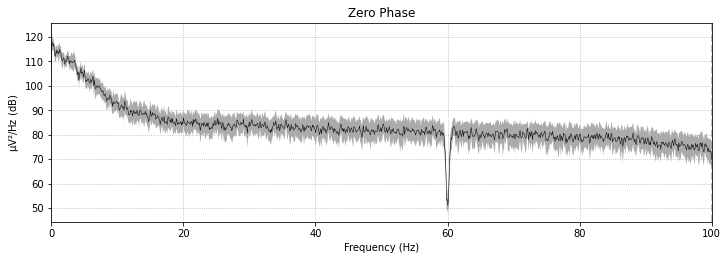

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


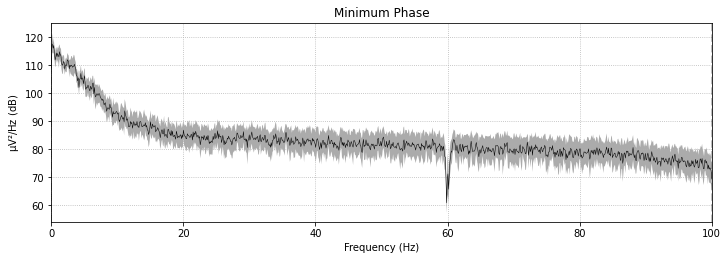

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


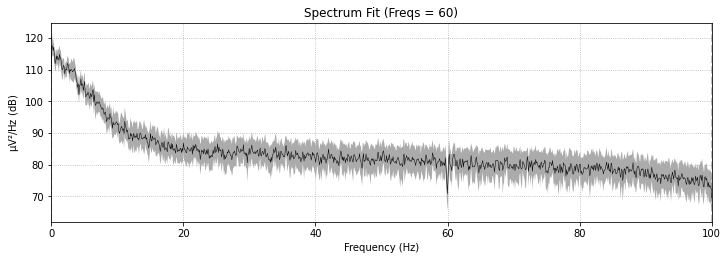

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


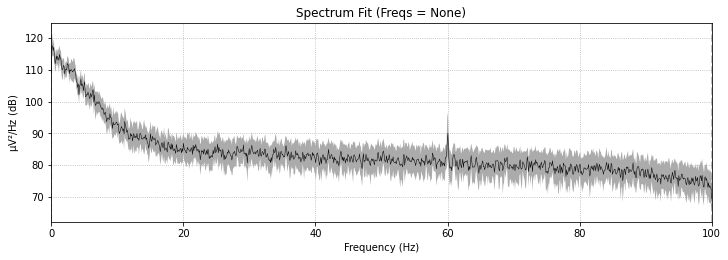

In [18]:
for i in range(len(raw_list)):
    raw_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title(titles[i])
    plt.show()

In [19]:
random_index = np.random.choice(i_vals, size = 1, replace = False)[0]

In [20]:
raw1 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = True)

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


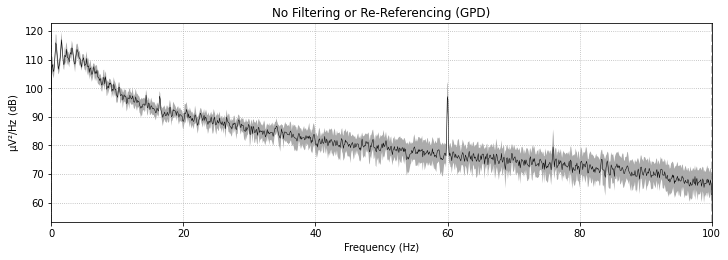

In [21]:
raw1.plot_psd(average = True, picks = 'eeg')
plt.title('No Filtering or Re-Referencing ({})'.format(df['expert_consensus'][random_index]))
plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


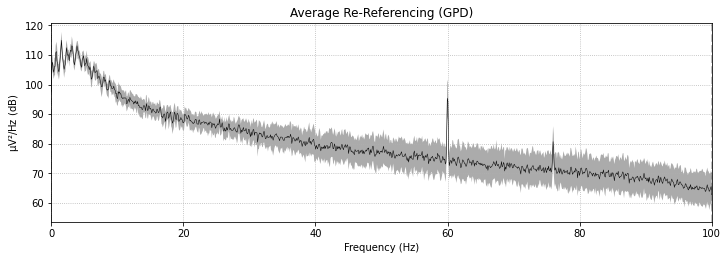

In [22]:
raw2.plot_psd(average = True, picks = 'eeg')
plt.title('Average Re-Referencing ({})'.format(df['expert_consensus'][random_index]))
plt.show()

### Adjusting Spectrum Fit P-Value

In [58]:
i_vals = [i for i in range(df.shape[0])]
random_index = np.random.choice(i_vals, size = 10, replace = False)

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


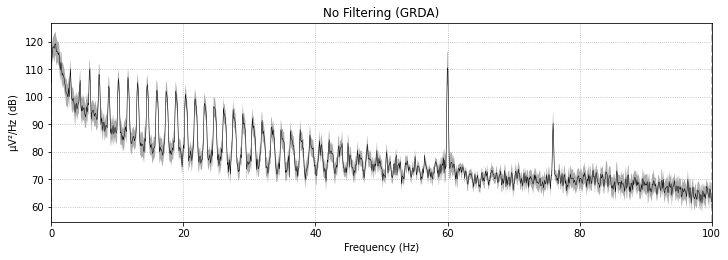

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


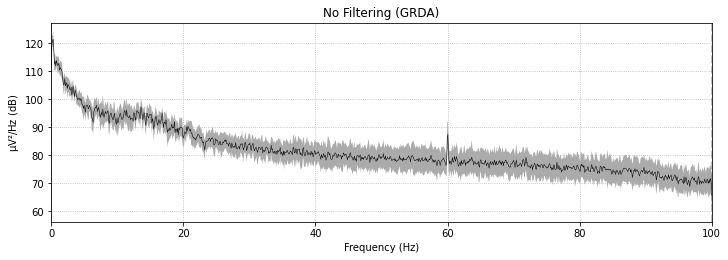

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


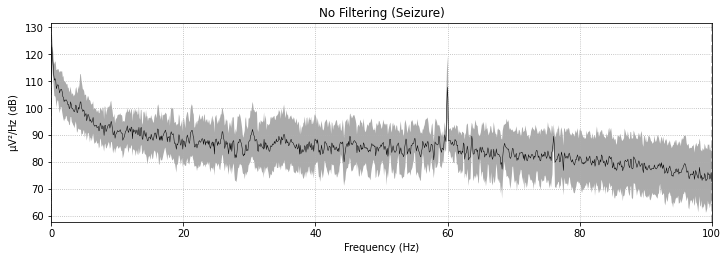

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


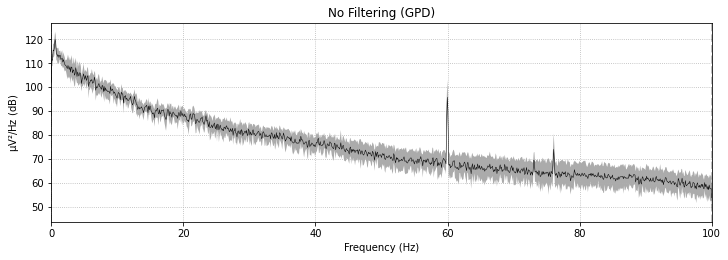

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


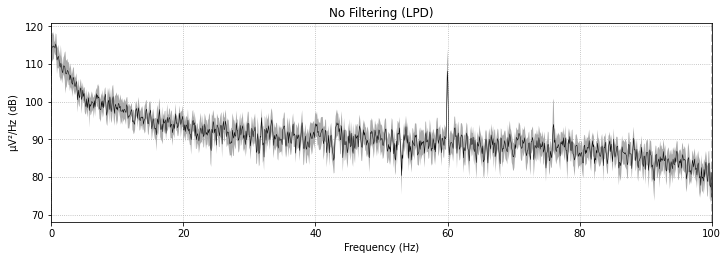

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


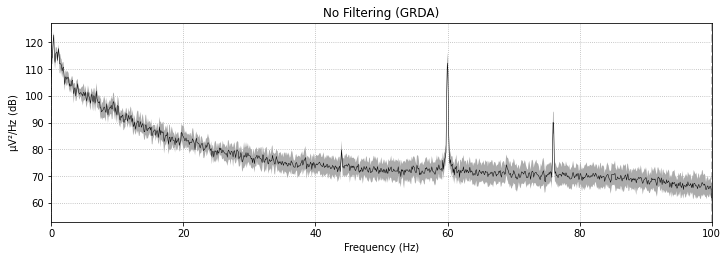

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


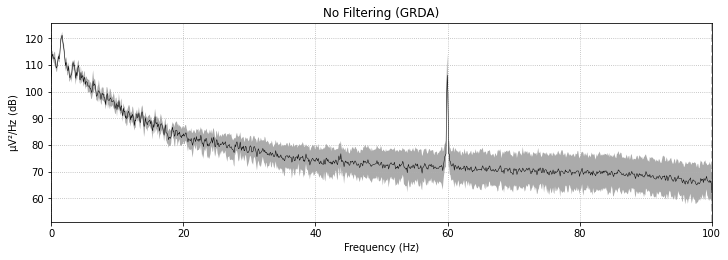

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


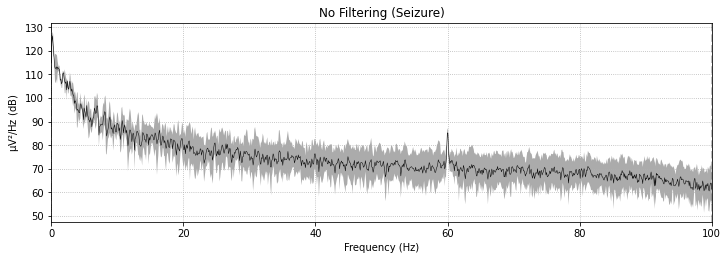

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


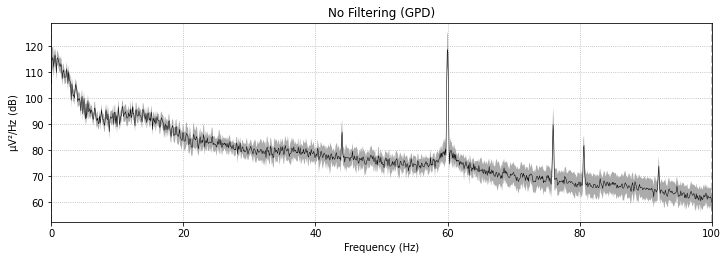

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


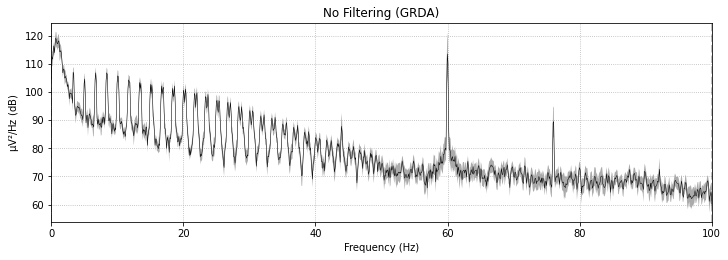

In [61]:
for i in random_index:
    raw = load_preprocess(df, i, 0.5, 90, bandpass = False, notch = False, reref = False)
    raw.plot_psd(average = True, picks = 'eeg')
    plt.title('No Filtering ({})'.format(df['expert_consensus'][i]))
    plt.show()

In [62]:
random_index[0], random_index[5], random_index[8], random_index[9]

(14147, 18765, 24769, 67610)

In [64]:
notch_testing = [random_index[0], random_index[5], random_index[8], random_index[9]]

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


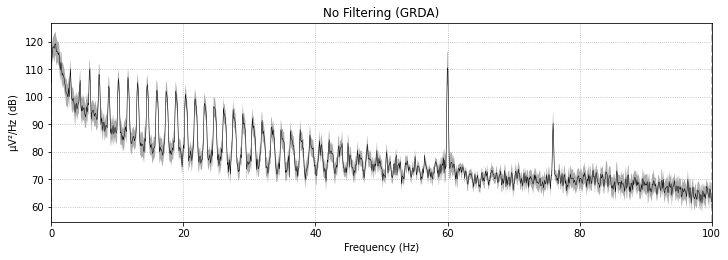

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


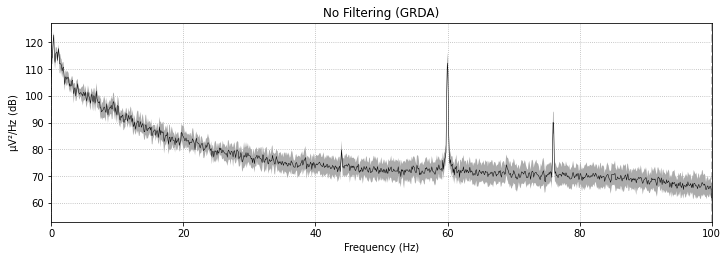

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


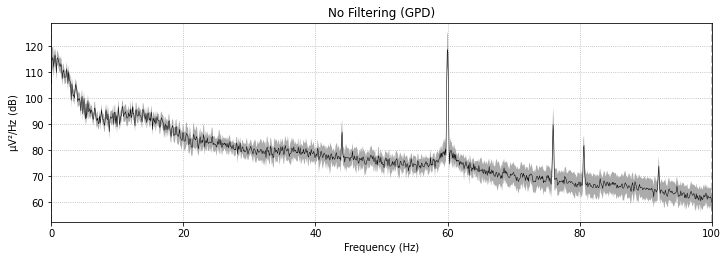

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


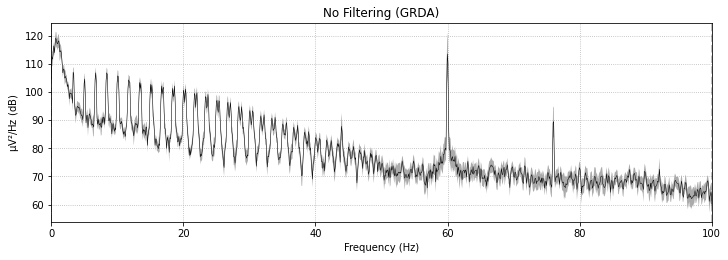

In [65]:
for i in notch_testing:
    raw = load_preprocess(df, i, 0.5, 90, bandpass = False, notch = False, reref = False)
    raw.plot_psd(average = True, picks = 'eeg')
    plt.title('No Filtering ({})'.format(df['expert_consensus'][i]))
    plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


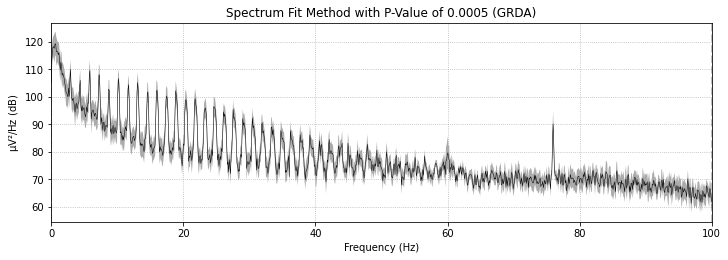

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


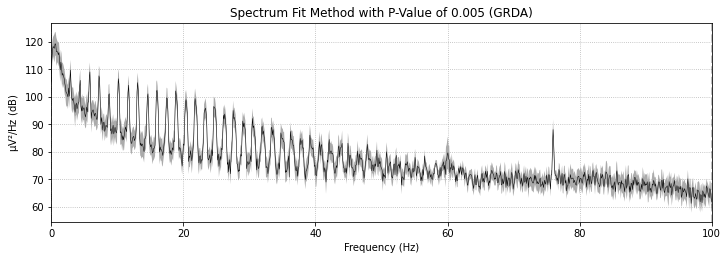

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


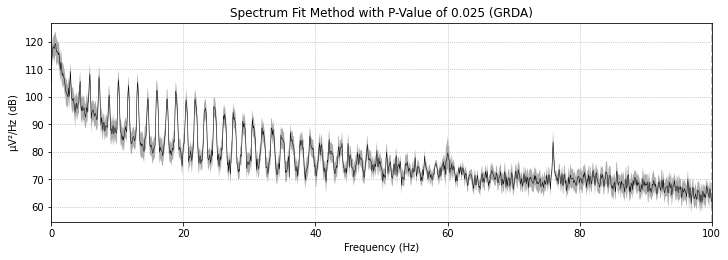

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


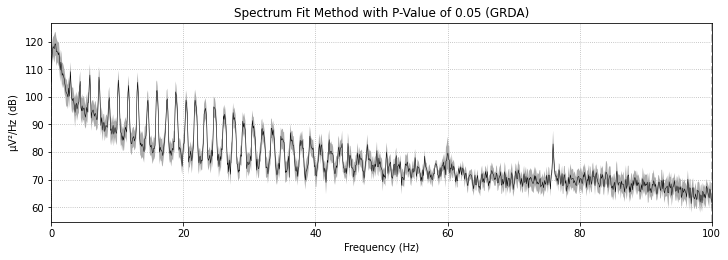

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


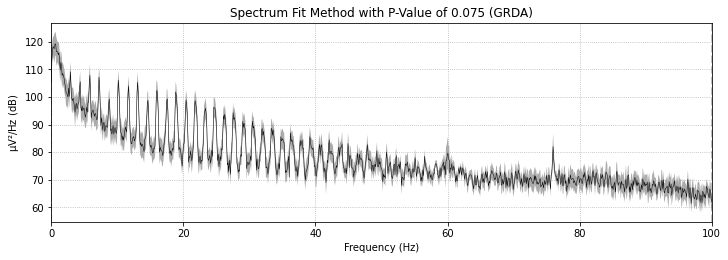

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


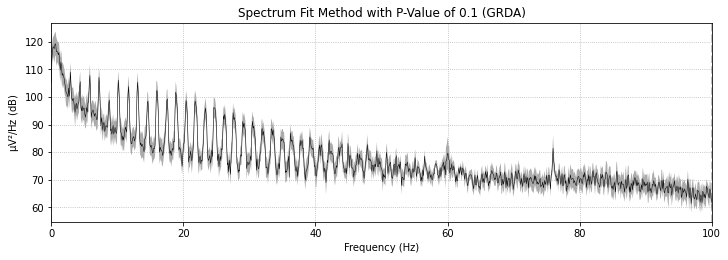

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


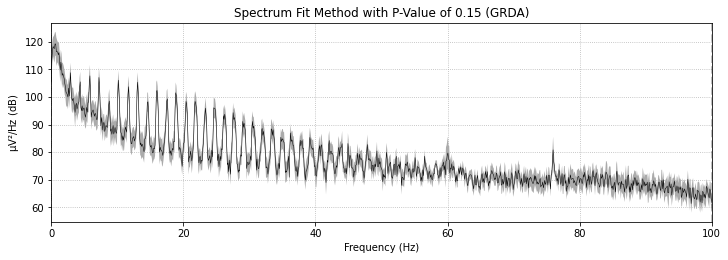

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


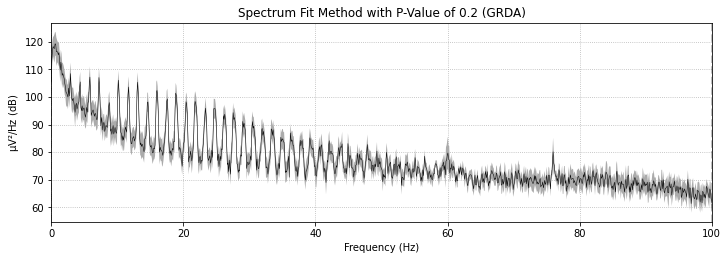

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


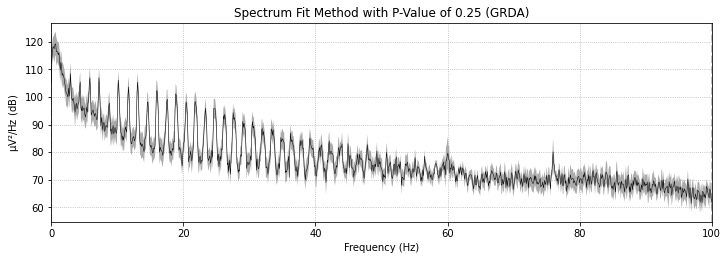

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


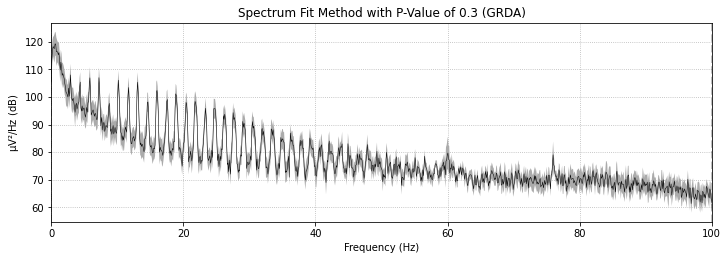

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


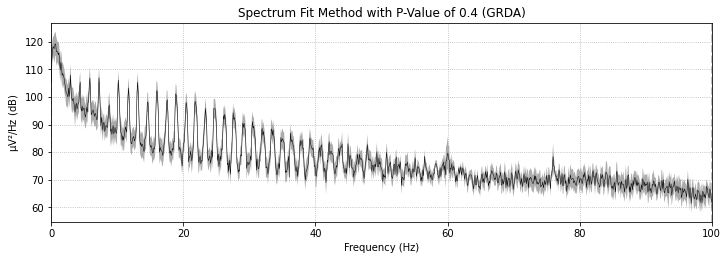

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


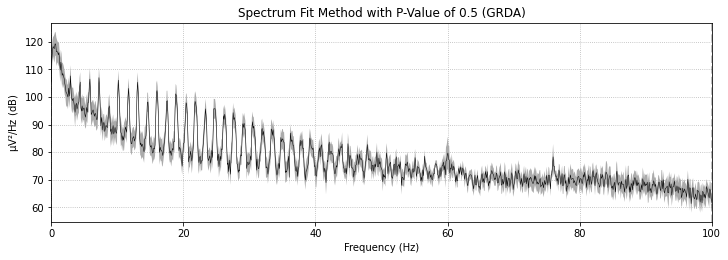

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


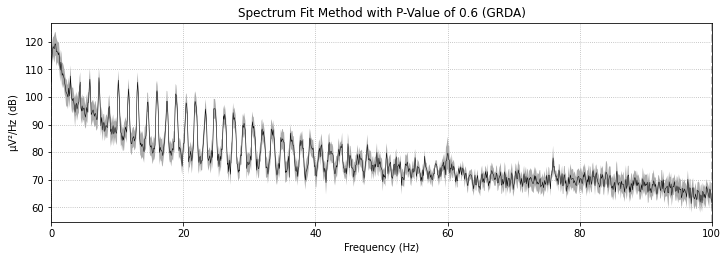

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


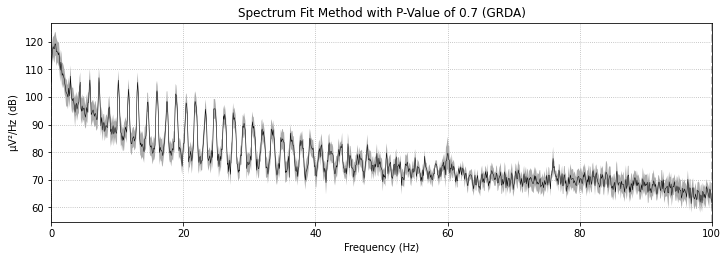

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


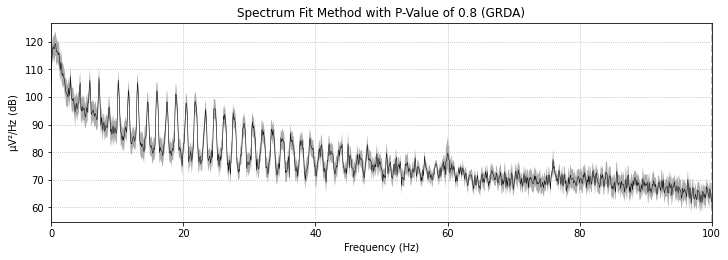

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


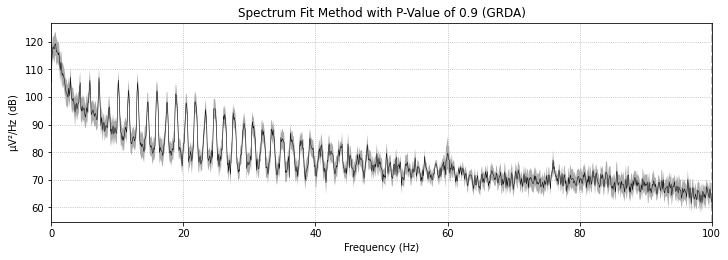

In [67]:
p_vals = [0.0005, 0.005, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in p_vals:
    raw = load_preprocess(df, notch_testing[0], 0.5, 90, bandpass = False, notch = False, reref = False)
    raw.notch_filter(freqs = None, method = 'spectrum_fit', p_value = p, picks = 'eeg')
    raw.plot_psd(average = True, picks = 'eeg')
    plt.title('Spectrum Fit Method with P-Value of {} ({})'.format(p, df['expert_consensus'][notch_testing[0]]))
    plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


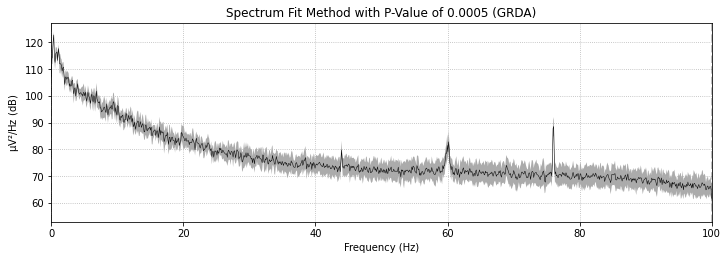

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


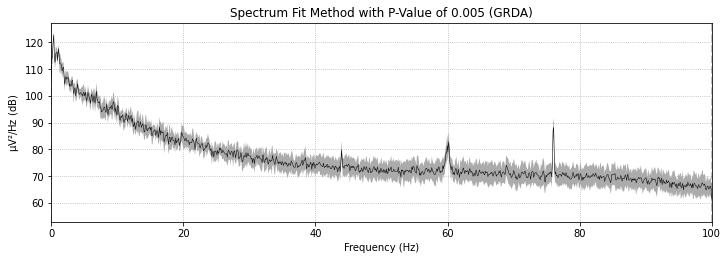

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


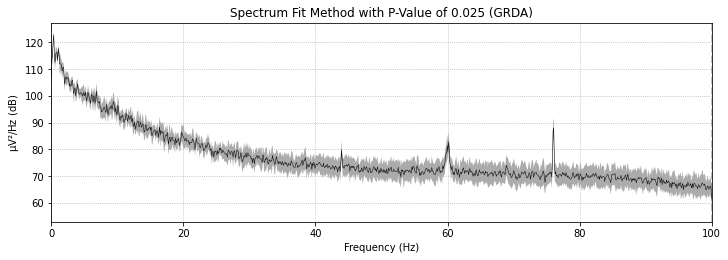

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


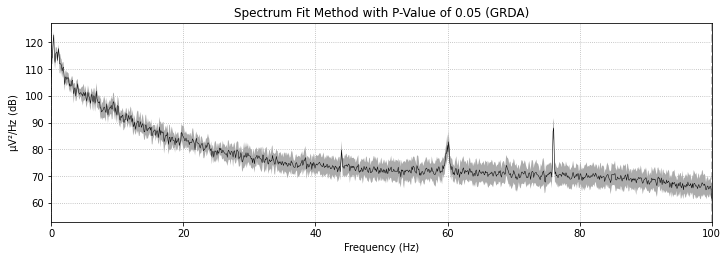

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


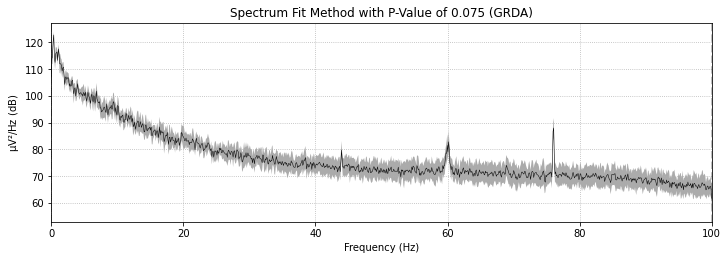

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


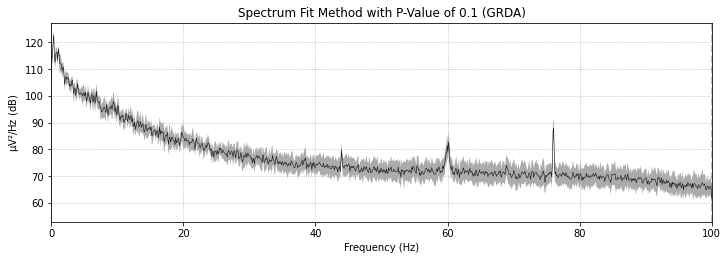

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


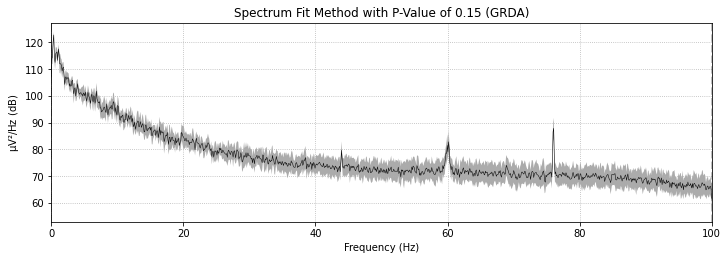

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


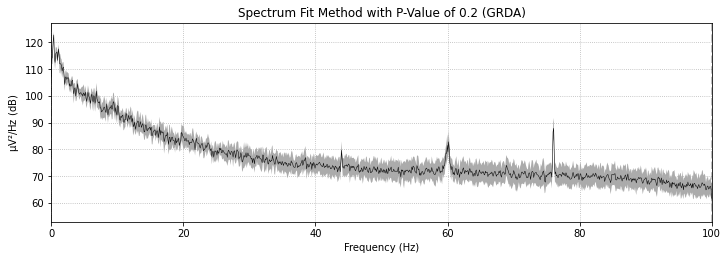

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


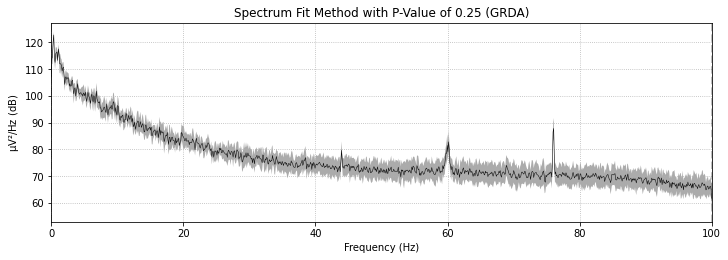

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


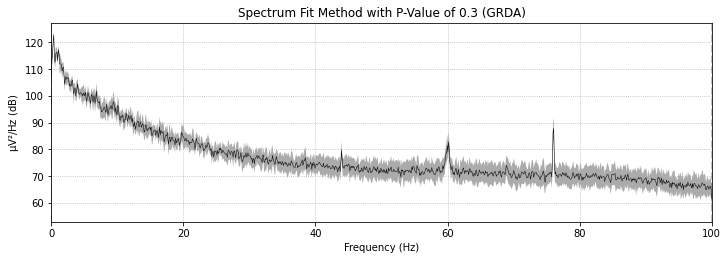

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


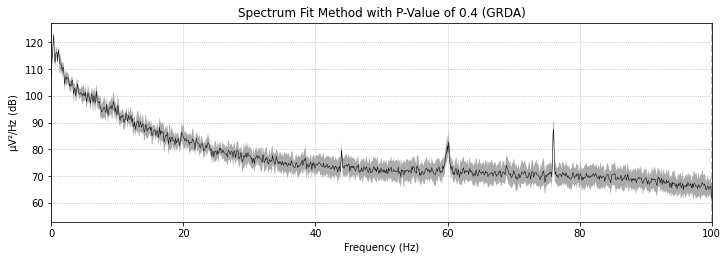

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


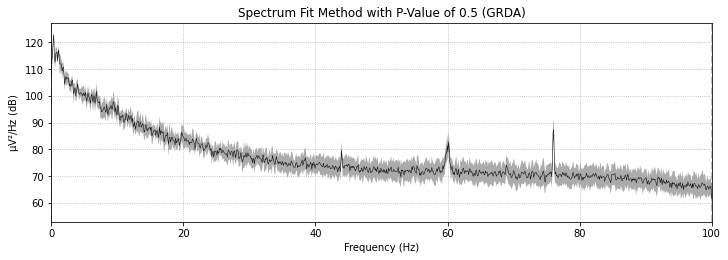

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


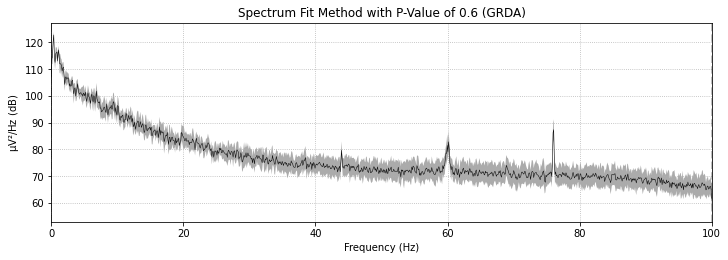

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


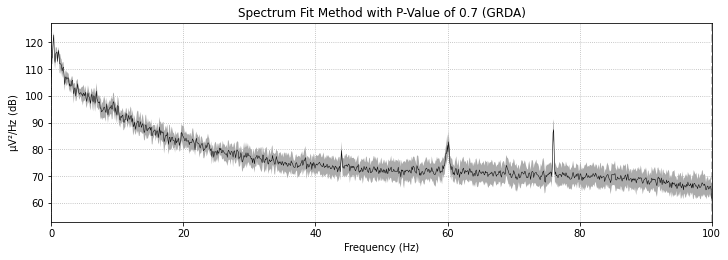

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


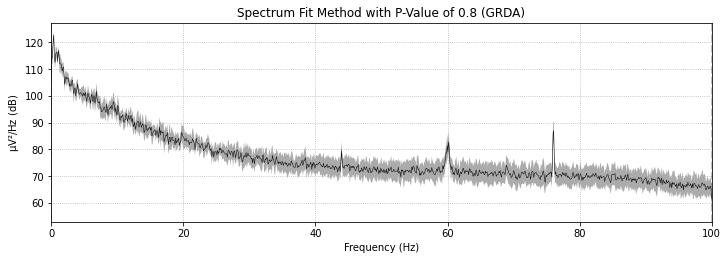

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


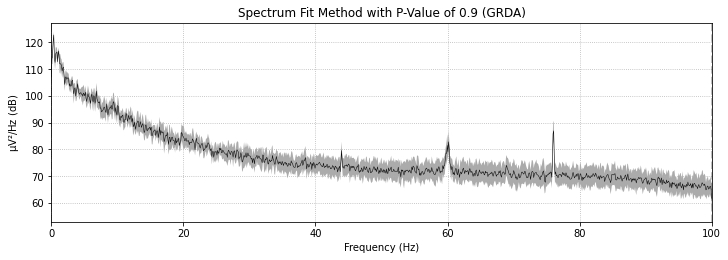

In [68]:
p_vals = [0.0005, 0.005, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in p_vals:
    raw = load_preprocess(df, notch_testing[1], 0.5, 90, bandpass = False, notch = False, reref = False)
    raw.notch_filter(freqs = None, method = 'spectrum_fit', p_value = p, picks = 'eeg')
    raw.plot_psd(average = True, picks = 'eeg')
    plt.title('Spectrum Fit Method with P-Value of {} ({})'.format(p, df['expert_consensus'][notch_testing[1]]))
    plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


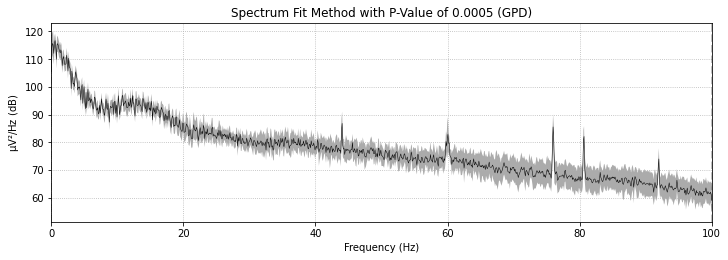

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


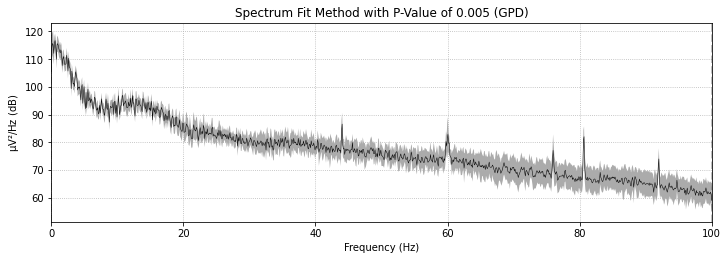

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


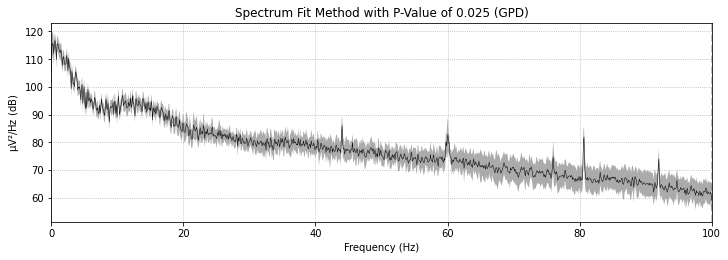

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


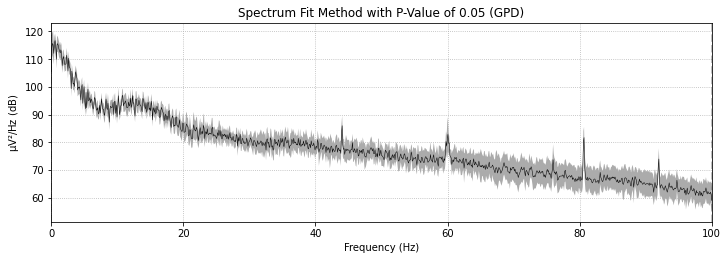

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


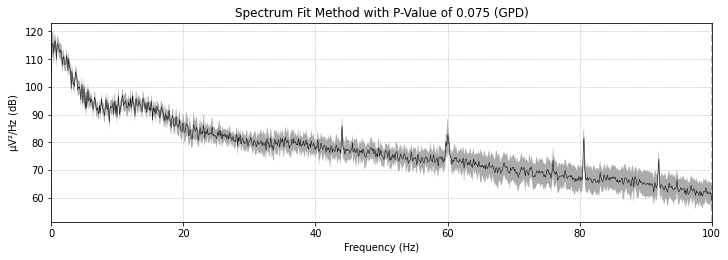

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


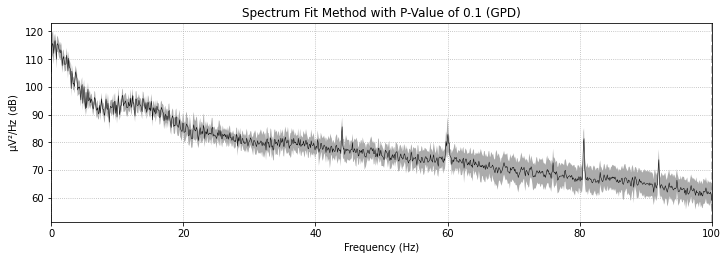

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


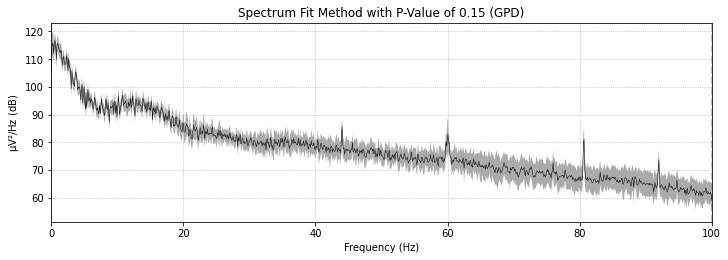

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


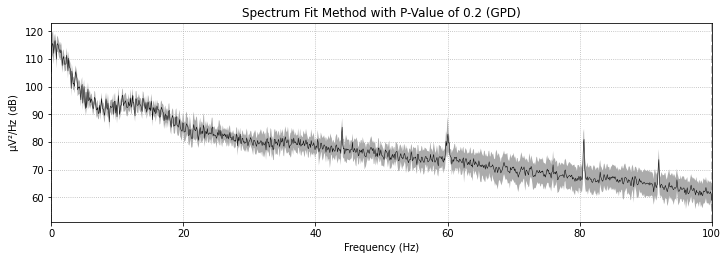

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


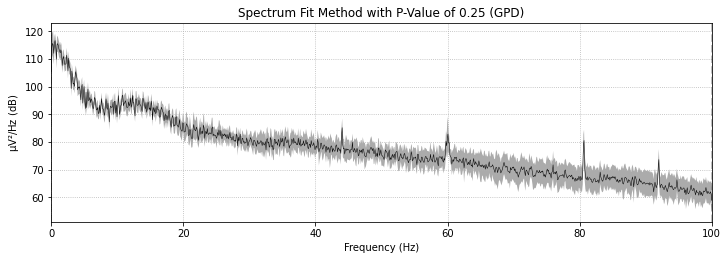

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


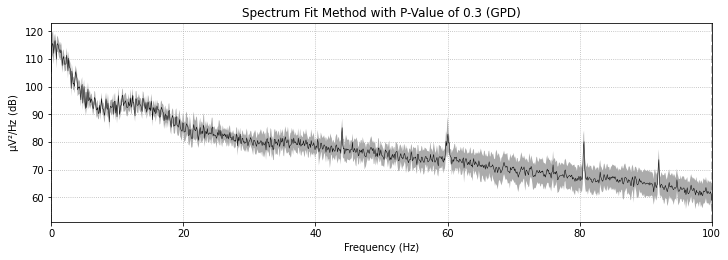

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


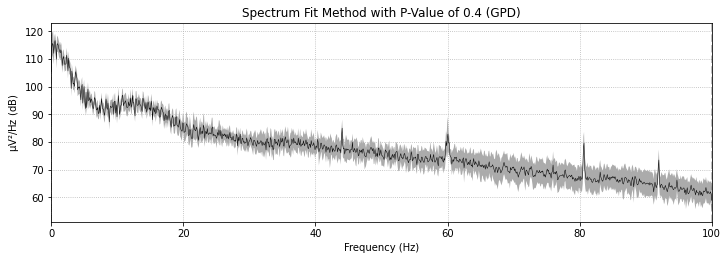

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


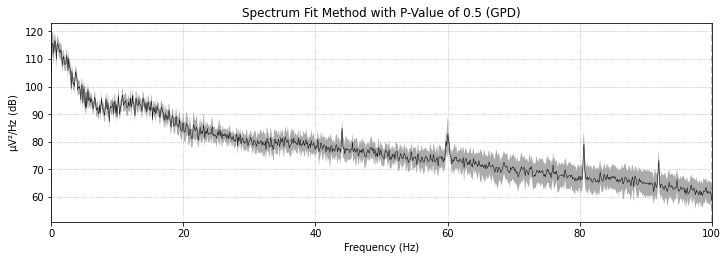

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


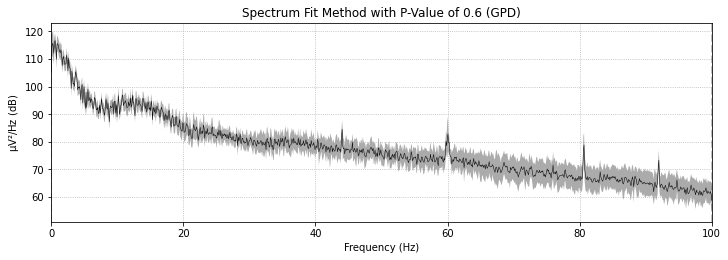

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


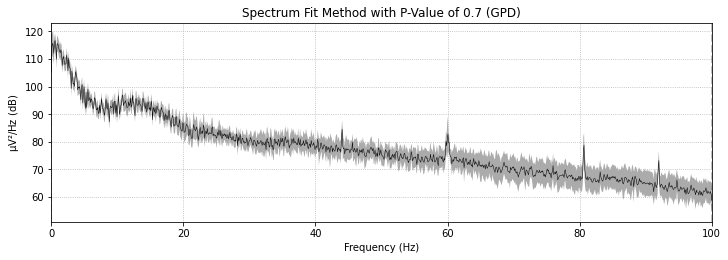

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


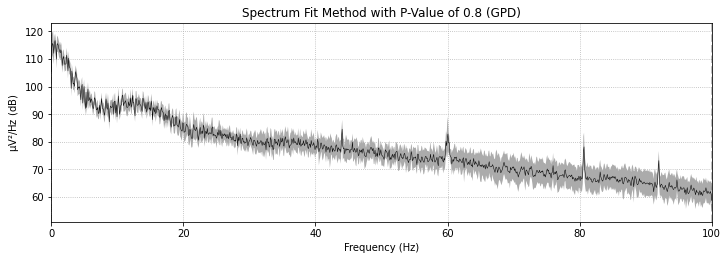

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


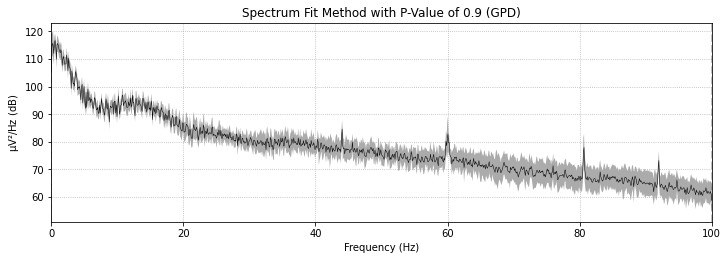

In [69]:
p_vals = [0.0005, 0.005, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in p_vals:
    raw = load_preprocess(df, notch_testing[2], 0.5, 90, bandpass = False, notch = False, reref = False)
    raw.notch_filter(freqs = None, method = 'spectrum_fit', p_value = p, picks = 'eeg')
    raw.plot_psd(average = True, picks = 'eeg')
    plt.title('Spectrum Fit Method with P-Value of {} ({})'.format(p, df['expert_consensus'][notch_testing[2]]))
    plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


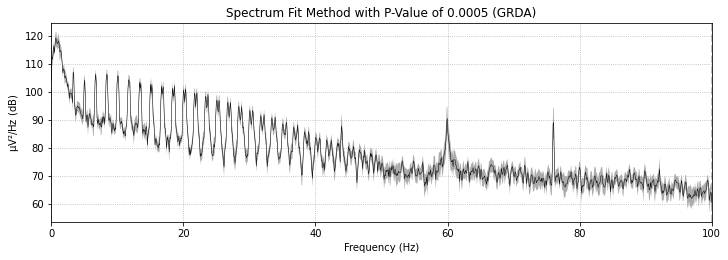

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


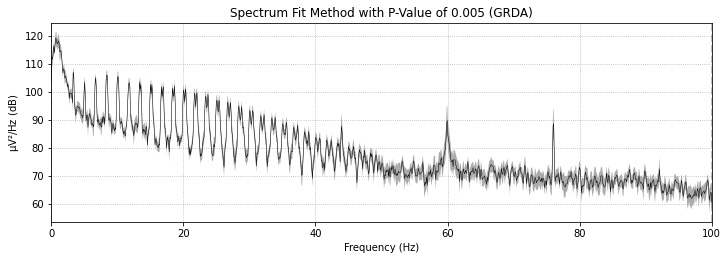

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


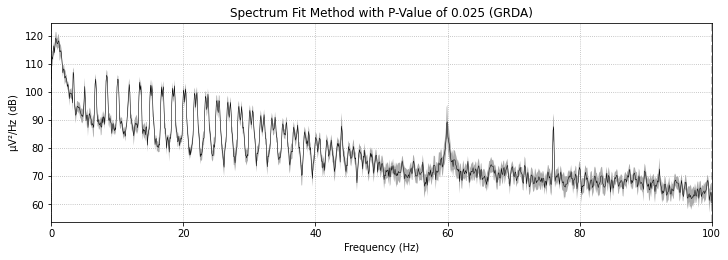

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


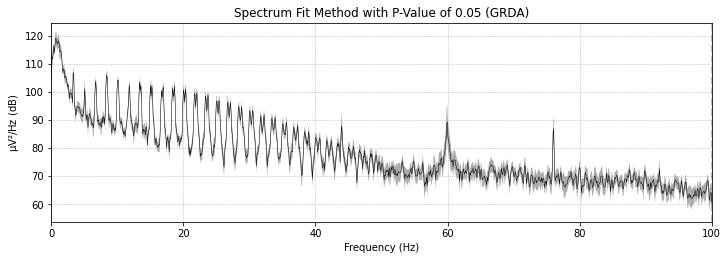

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


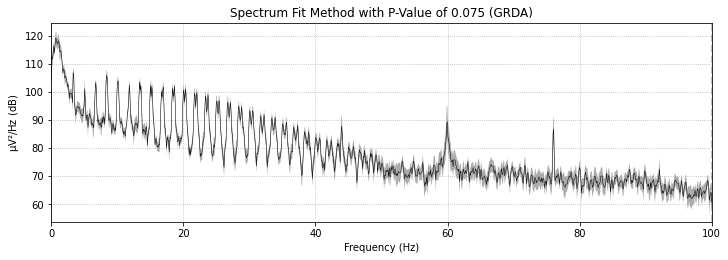

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


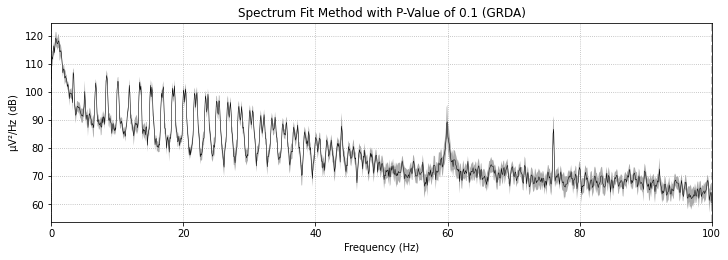

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


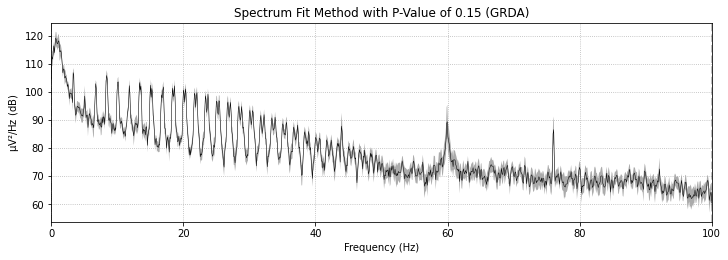

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


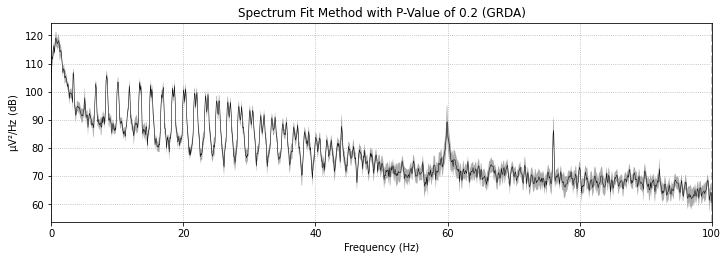

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


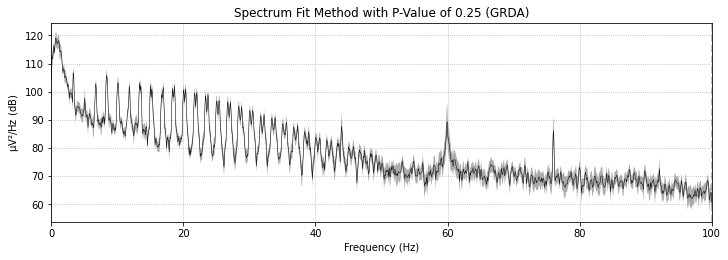

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


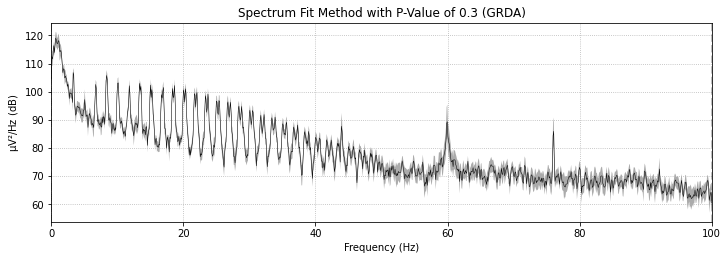

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


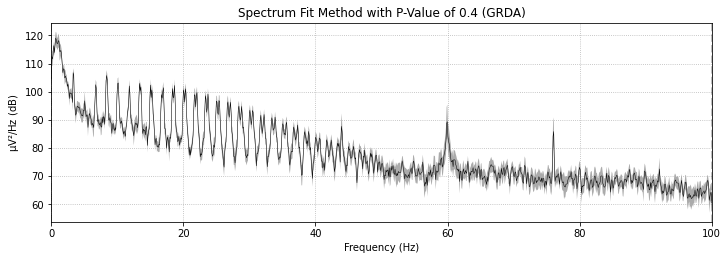

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


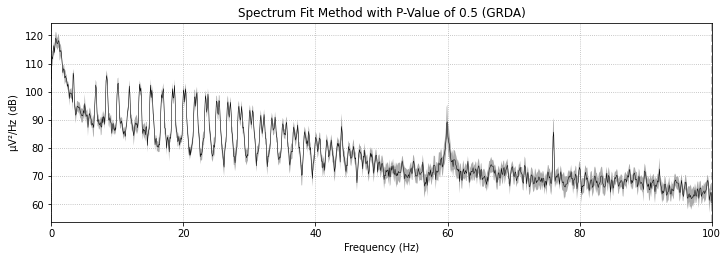

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


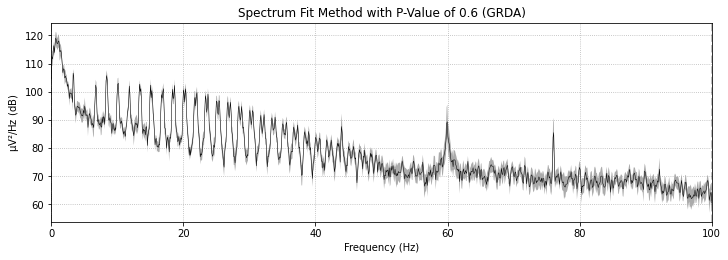

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


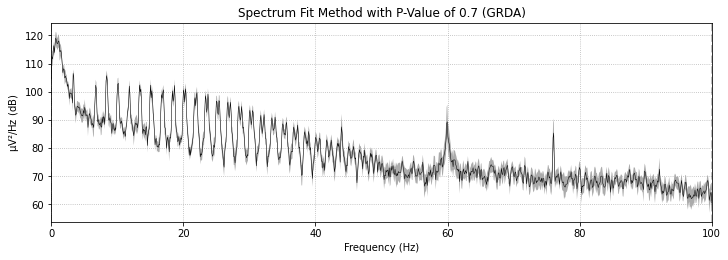

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


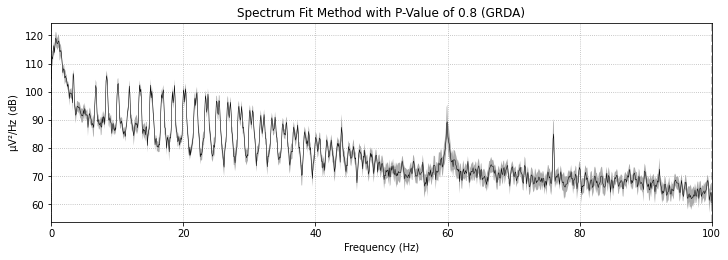

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


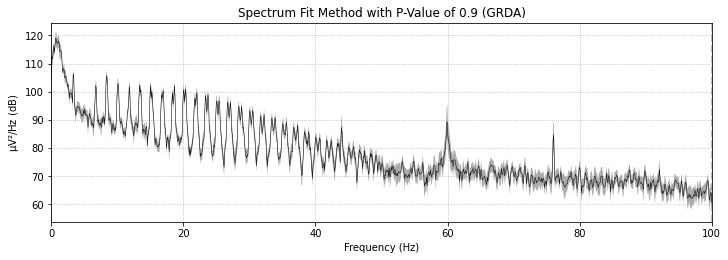

In [70]:
p_vals = [0.0005, 0.005, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in p_vals:
    raw = load_preprocess(df, notch_testing[3], 0.5, 90, bandpass = False, notch = False, reref = False)
    raw.notch_filter(freqs = None, method = 'spectrum_fit', p_value = p, picks = 'eeg')
    raw.plot_psd(average = True, picks = 'eeg')
    plt.title('Spectrum Fit Method with P-Value of {} ({})'.format(p, df['expert_consensus'][notch_testing[3]]))
    plt.show()

### Notes on Adjusting P-Value  
  
It makes sense to me that the higher the p-value (and therefore the lower the confidence level), the more data that gets filtered out. The effect as p approaches 1 is much smaller than I expected it to be.

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


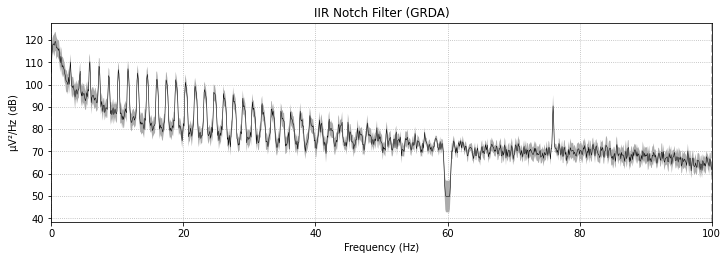

In [72]:
raw = load_preprocess(df, notch_testing[0], 0.5, 90, bandpass = False, notch = False, reref = False)
raw.notch_filter(60, method = 'iir', picks = 'eeg')
raw.plot_psd(average = True, picks = 'eeg')
plt.title('IIR Notch Filter ({})'.format(df['expert_consensus'][notch_testing[0]]))
plt.show()

### Notes on IIR Notch Filtering  
  
It looks like the IIR method filters out even more data than zero phase FIR does. I don't know how to adjust the IIR parameters, but I'm not sure this is the method I want to use.

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


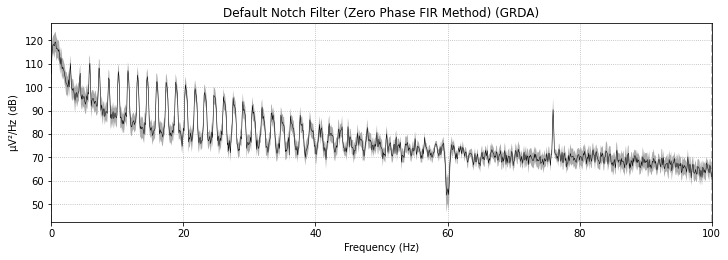

In [71]:
raw = load_preprocess(df, notch_testing[0], 0.5, 90, bandpass = False, notch = False, reref = False)
raw.notch_filter(60, picks = 'eeg')
raw.plot_psd(average = True, picks = 'eeg')
plt.title('Default Notch Filter (Zero Phase FIR Method) ({})'.format(df['expert_consensus'][notch_testing[0]]))
plt.show()

The diversion from the PSD trend is still there in the negative direction. Both are just under 60 dB at 60 Hz. The difference is that the FIR diversion is narrower than the IIR diversion. This is why I think the IIR method may not be best, but I should visualize this with a few more sub EEGs to see if this is true for other sub EEGs.

### KNN after Spectrum Fit Method

In [291]:
#specfit60_df = full_band_df(2000, activity_df_list, 0.5, 90, bandpass = True, notch = True, reref = False)
#specfit60_df.to_csv('specfit60_df.csv', index = None)

In [78]:
spectfit60_df = pd.read_csv('specfit60_df.csv')
y_true = get_yvals(2000)

X = specfit60_df.copy()
y = y_true['activity'].copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

### Spectrum Fit at 60 Hz Results  
  
Again, no change in testing accuracy from the default notch filter.

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_yhat = knn.predict(X_train)
testing_yhat = knn.predict(X_test)
print('Training (Spectrum Fit Notch Filtering (freqs = 60 Hz))')
print(classification_report(y_train, training_yhat))
print('Testing (Spectrum Fit Notch Filtering (freqs = 60 Hz))')
print(classification_report(y_test, testing_yhat))

Training (Spectrum Fit Notch Filtering (freqs = 60 Hz))
              precision    recall  f1-score   support

         GPD       0.78      0.92      0.84      1794
        GRDA       0.73      0.88      0.80      1819
         LPD       0.72      0.85      0.78      1800
        LRDA       0.81      0.87      0.84      1795
       Other       0.76      0.50      0.61      1808
     Seizure       0.87      0.60      0.71      1784

    accuracy                           0.77     10800
   macro avg       0.78      0.77      0.76     10800
weighted avg       0.78      0.77      0.76     10800

Testing (Spectrum Fit Notch Filtering (freqs = 60 Hz))
              precision    recall  f1-score   support

         GPD       0.73      0.88      0.80       206
        GRDA       0.59      0.80      0.68       181
         LPD       0.62      0.78      0.69       200
        LRDA       0.70      0.77      0.73       205
       Other       0.51      0.33      0.40       192
     Seizure       0.

### IIR Filtering

In [ ]:
from scipy.signal import butter, filtfilt 

# specs for IIR bandpass filter 
order = 4      # steepness of the filter 
fs = 200       # sampling frequency 
lowcut = 20    # lower cutoff freq 
highcut = 80   # higher cutoff freq 
nyquist = 0.5 * fs   # whatever nyquist freq is       
# nyquist freq = half the sampling rate 
 
# normalize cutoffs 
low = lowcut / nyquist 
high = highcut / nyquist 

# Butterworth bandpass filters (type of IIR)
b, a = butter(order, [low, high], btype = 'band')

# apply extra filter with filtfilt: gives you a zero-phase response 
filtered_signal = filtfilt(b, a, raw_signal)    # whatever signal is = "raw_signal" 

In [268]:
raw = load_preprocess(df, 50, 0.5, 90, bandpass = False, notch = False, reref = False)
raw.get_data().shape, raw.get_data().T.shape

((20, 10000), (10000, 20))

In [269]:
stored_info = raw.info

In [270]:
electrodes = get_sub_eeg(df, 0).drop(columns = 'EKG').columns

In [271]:
from scipy.signal import butter, filtfilt

def iir_eeg(raw, n_channels, order, sfreq, l_freq, h_freq, b_type):
    filtered_eeg = pd.DataFrame()
    for i in range(n_channels):
        filtered_signal = iir_signal(raw.get_data()[i], order, sfreq, l_freq, h_freq, b_type)
        filtered_eeg = pd.concat([filtered_eeg, filtered_signal], axis = 1)
    filtered_eeg.columns = electrodes
    return filtered_eeg

def iir_signal(raw_signal, order, sfreq, l_freq, h_freq, b_type):
    nyquist = 0.5 * sfreq
    low = l_freq / nyquist
    high = h_freq / nyquist
    b, a = butter(order, [low, high], btype = b_type)
    filtered_signal = filtfilt(b, a, raw_signal)
    return pd.DataFrame(filtered_signal)

In [272]:
filtered_eeg = iir_eeg(raw, 19, 4, 200, 59.85, 60.15, 'bandstop')

In [273]:
filtered_eeg

Fp1        F3        C3        P3        F7        T3        T5  \
0     0.473846  0.476549  0.389035  0.085487  0.547797  0.402494  0.211444   
1     0.487491  0.272782  0.128715 -0.120477  0.421777  0.183361 -0.020417   
2     0.477874  0.369732  0.306342  0.054671  0.483145  0.351121  0.078279   
3     0.475726  0.484222  0.466063  0.110863  0.566172  0.442566  0.219221   
4     0.460292  0.371562  0.297792 -0.018171  0.518516  0.295346  0.067947   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.296236  0.289289  0.043018 -0.056169  0.266130  0.267278  0.068930   
9996  0.325750  0.307724  0.060957  0.005389  0.325450  0.350208  0.111456   
9997  0.292467  0.276840  0.067852 -0.011994  0.232847  0.326557  0.115240   
9998  0.303532  0.290968  0.104802  0.048808  0.290719  0.361834  0.149943   
9999  0.321710  0.205519  0.023744  0.007488  0.193548  0.318082  0.126204   

            O1        Fz        Cz        Pz       Fp2        F4        C4  \
0     0.111403  0.120703  0.372636 -0.043356  0.209735  0.323611  0.277359   
1    -0.079187  0.008937  0.098289 -0.181565  0.262507  0.234902  0.016595   
2     0.119576  0.139876  0.250235 -0.083504  0.190910  0.326798  0.202681   
3     0.147541  0.094553  0.310399 -0.060240  0.175236  0.393017  0.260608   
4     0.024556  0.078654  0.185004 -0.091668  0.227367  0.310342  0.122315   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -0.069019  0.487342 -0.447106 -0.102507  0.178495  0.469380 -0.026867   
9996 -0.051045  0.456069 -0.460281 -0.078907  0.174756  0.491916 -0.007173   
9997 -0.069119  0.443749 -0.464957 -0.115375  0.220475  0.422966 -0.014507   
9998 -0.053758  0.424586 -0.465374 -0.060764  0.142681  0.471657 -0.002116   
9999 -0.097657  0.386497 -0.479103 -0.130344  0.115692  0.444492 -0.155161   

            P4        F8        T4        T6        O2  
0     0.164859  0.358017  0.399469  0.253090  0.147880  
1    -0.030708  0.274010  0.231639  0.048774 -0.023229  
2     0.116961  0.343676  0.308412  0.206879  0.068135  
3     0.154798  0.408692  0.416470  0.290798  0.169685  
4     0.037907  0.352251  0.318915  0.154520  0.085681  
...        ...       ...       ...       ...       ...  
9995 -0.108990  0.140081 -0.000810 -0.085069  0.028636  
9996 -0.120241  0.170614 -0.023905 -0.064461  0.041942  
9997 -0.164797  0.124643 -0.055788 -0.129379  0.019547  
9998 -0.134995  0.150081 -0.032671 -0.108316  0.028602  
9999 -0.168012  0.146859 -0.087857 -0.113105 -0.021164  

[10000 rows x 19 columns]

In [274]:
filtered_eeg['EKG'] = raw.get_data()[19]

In [275]:
info = mne.create_info(
        filtered_eeg.columns.to_list(),
        ch_types=(["eeg"]*(len(filtered_eeg.columns)-1))+['ecg'],
        sfreq=200
)
info.set_montage("standard_1020")

raw_filtered = mne.io.RawArray(
        filtered_eeg.to_numpy().T,
        info
)

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


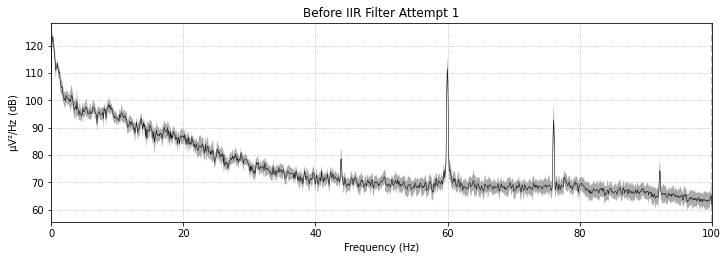

In [276]:
raw.plot_psd(average = True, picks = 'eeg')
plt.title('Before IIR Filter Attempt 1')
plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


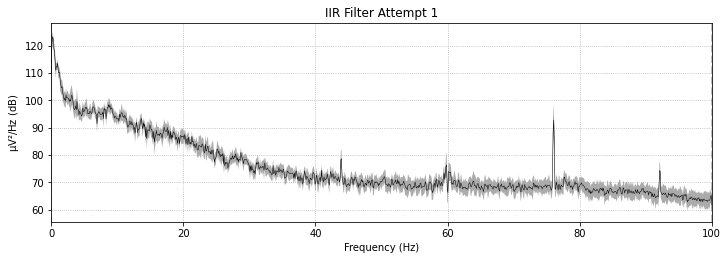

In [277]:
raw_filtered.plot_psd(average = True, picks = 'eeg')
plt.title('IIR Filter Attempt 1')
plt.show()

### Notes on the IIR Filter  
  
This can likely be done with MNE. The notch filter function has an iir method option and iir filter parameters are able to be adjusted. It was helpful to manually set one up. I should try this with more than just one sub EEG and see how consistently it works, but making sure the btype was bandstop and the frequency boundaries were optimized has produced what looks like a good result. If the results appear consistent, then it's worth attempting with MNE.

In [278]:
i_vals = [i for i in range(df.shape[0])]
random_indexes = np.random.choice(i_vals, size = 20, replace = True)

raw0 = load_preprocess(df, random_indexes[0], 0.5, 90, bandpass = False, notch = False, reref = False)
raw1 = load_preprocess(df, random_indexes[1], 0.5, 90, bandpass = False, notch = False, reref = False)
raw2 = load_preprocess(df, random_indexes[2], 0.5, 90, bandpass = False, notch = False, reref = False)
raw3 = load_preprocess(df, random_indexes[3], 0.5, 90, bandpass = False, notch = False, reref = False)
raw4 = load_preprocess(df, random_indexes[4], 0.5, 90, bandpass = False, notch = False, reref = False)

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


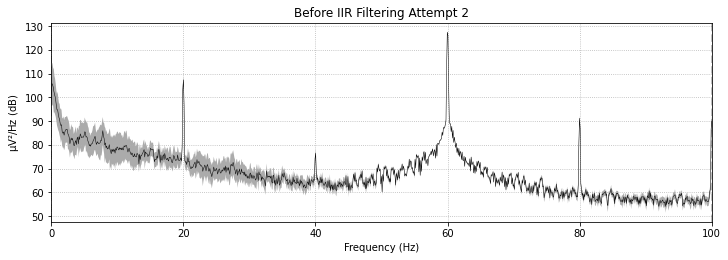

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


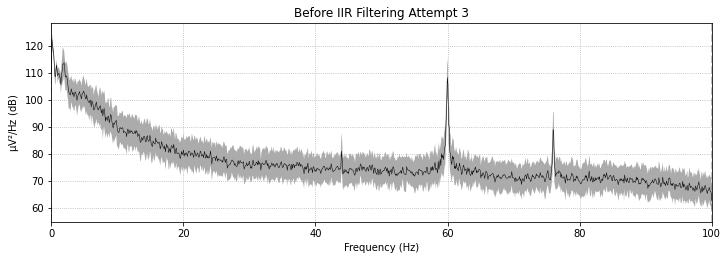

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


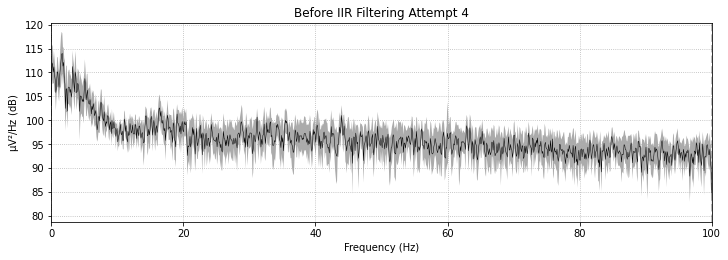

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


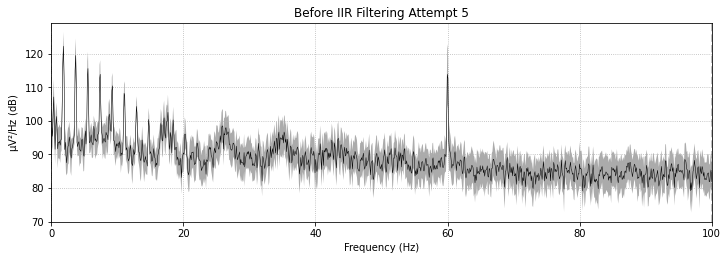

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


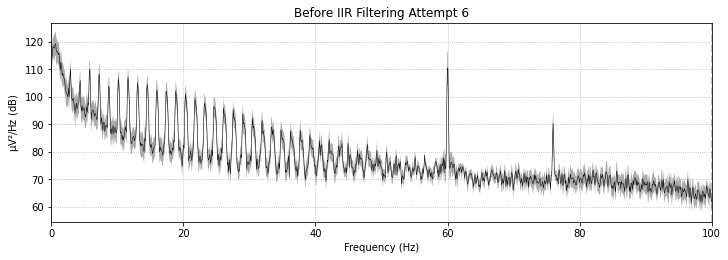

In [279]:
raw_list = [raw0, raw1, raw2, raw3, raw4]
for i in range(len(raw_list)):
    raw_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title('Before IIR Filtering Attempt {}'.format(i + 2))
    plt.show()

In [280]:
filtered_eeg0 = iir_eeg(raw_list[0], 19, 4, 200, 59.85, 60.15, 'bandstop')
filtered_eeg1 = iir_eeg(raw_list[1], 19, 4, 200, 59.85, 60.15, 'bandstop')
filtered_eeg2 = iir_eeg(raw_list[2], 19, 4, 200, 59.85, 60.15, 'bandstop')
filtered_eeg3 = iir_eeg(raw_list[3], 19, 4, 200, 59.85, 60.15, 'bandstop')
filtered_eeg4 = iir_eeg(raw_list[4], 19, 4, 200, 59.85, 60.15, 'bandstop')

In [281]:
filtered_eeg0['EKG'] = raw_list[0].get_data()[19]
filtered_eeg1['EKG'] = raw_list[1].get_data()[19]
filtered_eeg2['EKG'] = raw_list[2].get_data()[19]
filtered_eeg3['EKG'] = raw_list[3].get_data()[19]
filtered_eeg4['EKG'] = raw_list[4].get_data()[19]

In [282]:
def get_raw_array(eeg):
    info = mne.create_info(
            eeg.columns.to_list(),
            ch_types=(["eeg"]*(len(filtered_eeg.columns)-1))+['ecg'],
            sfreq=200
    )
    info.set_montage("standard_1020")

    raw_filtered = mne.io.RawArray(
            eeg.to_numpy().T,
            info
    )
    return raw_filtered

In [283]:
raw_filtered0 = get_raw_array(filtered_eeg0)
raw_filtered1 = get_raw_array(filtered_eeg1)
raw_filtered2 = get_raw_array(filtered_eeg2)
raw_filtered3 = get_raw_array(filtered_eeg3)
raw_filtered4 = get_raw_array(filtered_eeg4)

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


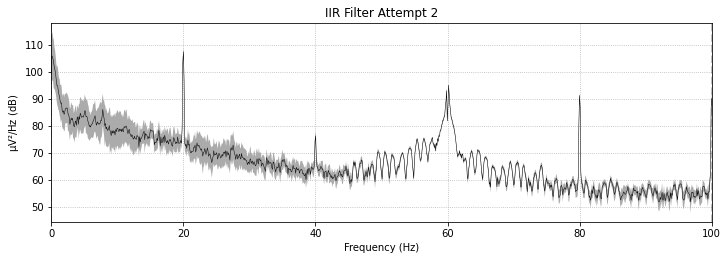

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


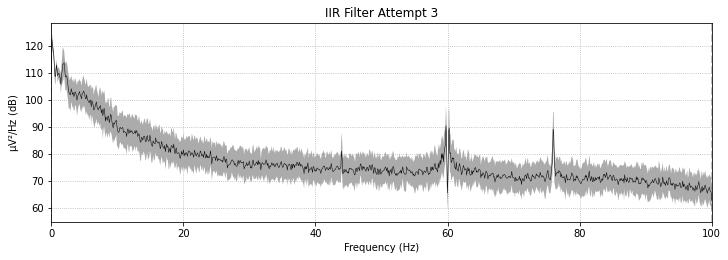

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


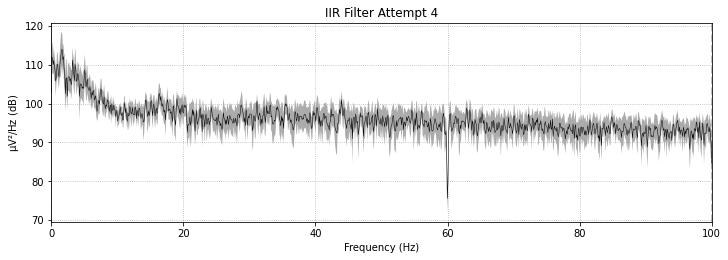

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


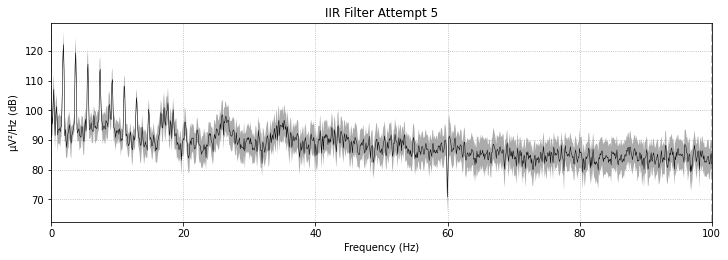

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


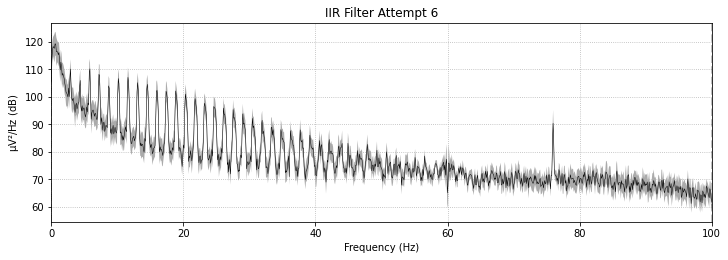

In [284]:
filtered_list = [raw_filtered0, raw_filtered1, raw_filtered2, raw_filtered3, raw_filtered4]

for i in range(len(filtered_list)):
    filtered_list[i].plot_psd(average = True, picks = 'eeg')
    plt.title('IIR Filter Attempt {}'.format(i + 2))
    plt.show()